# COVID-19 pandemic

The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing global pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, China. The World Health Organization declared the outbreak a Public Health Emergency of International Concern on 20 January 2020, and later a pandemic on 11 March 2020. As of 29 March 2021, more than 127 million cases have been confirmed, with more than 2.78 million deaths attributed to COVID-19, making it one of the deadliest pandemics in history.

Symptoms of COVID-19 are highly variable, ranging from none to life-threatening illness. The virus spreads mainly through the air when people are near each other. It leaves an infected person as they breathe, cough, sneeze, or speak and enters another person via their mouth, nose, or eyes. It may also spread via contaminated surfaces. People remain contagious for up to two weeks, and can spread the virus even if they are asymptomatic.

Recommended preventive measures include social distancing, wearing face masks in public, ventilation and air-filtering, hand washing, covering one's mouth when sneezing or coughing, disinfecting surfaces, and monitoring and self-isolation for people exposed or symptomatic. Several vaccines are being developed and distributed. Current treatments focus on addressing symptoms while work is underway to develop therapeutic drugs that inhibit the virus. Authorities worldwide have responded by implementing travel restrictions, lockdowns, workplace hazard controls, and facility closures. Many places have also worked to increase testing capacity and trace contacts of the infected.

The pandemic has resulted in significant global social and economic disruption, including the largest global recession since the Great Depression. It led to widespread supply shortages exacerbated by panic buying, agricultural disruption and food shortages, and decreased emissions of pollutants and greenhouse gases. Many educational institutions and public areas have been partially or fully closed, and many events have been cancelled or postponed. Misinformation has circulated through social media and mass media. The pandemic has raised issues of racial and geographic discrimination, health equity, and the balance between public health imperatives and individual rights.

Source:**Wikipedia**

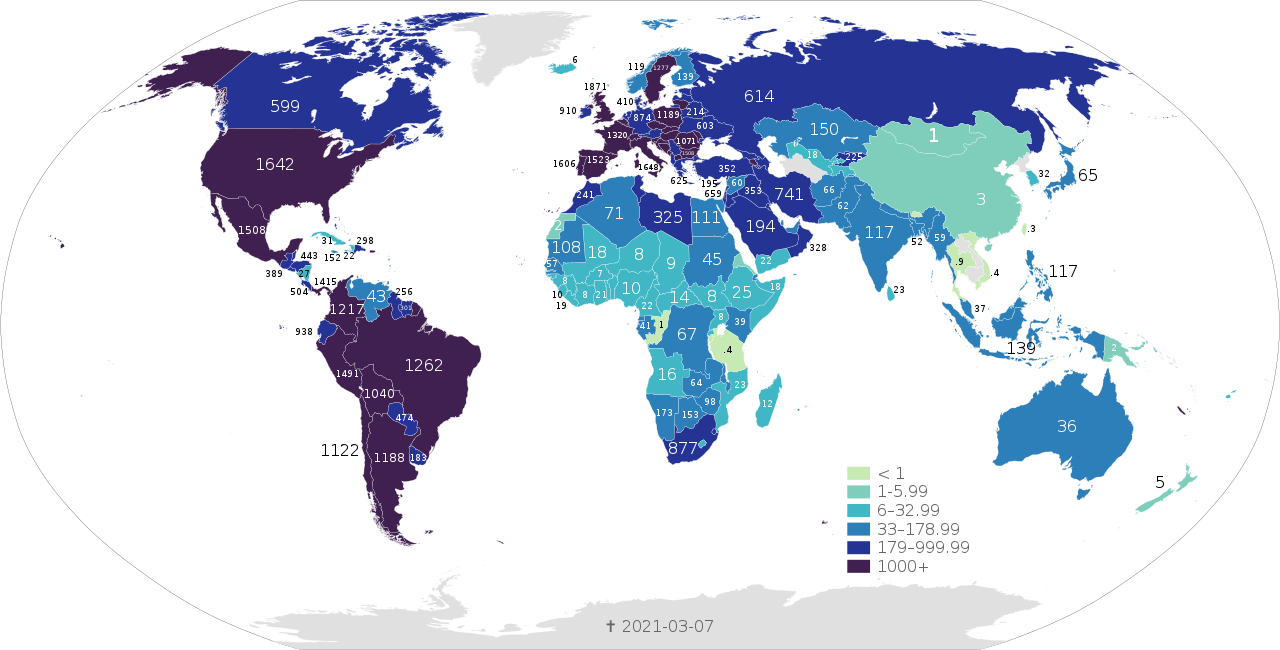

**Confirmed deaths per 1,000,000 population as of 7 March 2021**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

# Data Preparation

In [3]:
Files=os.listdir('../input/covid19-worldwide')
Files

['covid_19_clean_complete.csv',
 'country_wise_latest.csv',
 'day_wise.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv',
 'full_grouped.csv']

In [4]:
def read_data(path,filename):
    return pd.read_csv(path+'/'+filename)

In [5]:
path='../input/covid19-worldwide'
world_data=read_data(path,'worldometer_data.csv')

In [6]:
day_wise=read_data(path,'day_wise.csv')
group_data=read_data(path,'full_grouped.csv')
usa_data=read_data(path,'usa_country_wise.csv')
province_data=read_data(path,'country_wise_latest.csv')

# Which country has maximum total Cases ,Deaths,Recovered & Active cases

In [7]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [8]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [9]:
columns=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']
for i in columns:
    fig=px.treemap(world_data[0:20],values=i,path=['Country/Region'],title="<b>TreeMap representation of different Countries w.r.t. their {}</b>".format(i))
    fig.show()

# The trend of Confirmed Deaths Recovered Active cases

In [10]:
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [11]:
day_wise.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [12]:
fig=px.line(day_wise,x='Date',y=['Confirmed', 'Deaths', 'Recovered', 'Active'],title='Covid cases w.r.t. to date',template='plotly_dark')
fig.show()

# Visualise population to tests done Ratio

In [13]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [14]:
pop_test_ratio=world_data.iloc[0:20]['Population']/world_data.iloc[0:20]['TotalTests']

In [15]:
pop_test_ratio

0       5.245489
1      16.106896
2      62.365033
3       4.911040
4      18.852446
5     122.115932
6      13.241331
7      10.866949
8      28.269105
9       6.618696
10     32.187237
11      3.877883
12      9.589865
13    107.484026
14    134.558952
15      8.514790
16     16.613857
17     56.934398
18      9.760649
19     16.353942
dtype: float64

In [16]:
fig=px.bar(world_data.iloc[0:20],color='Country/Region',y=pop_test_ratio,x='Country/Region',title="<b>Population to tests done ratio</b>")
fig.show()

# 20 Countries that are badly affected by Corona

In [17]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [18]:
px.bar(world_data.iloc[0:20],x='Country/Region',y=['Serious,Critical','TotalDeaths','TotalRecovered','ActiveCases','TotalCases'])

# Top 20 countries of Total Confirmed Cases, Total Recovered Cases , Total Deaths, Total Active Cases

In [19]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [20]:
world_data['Country/Region'].nunique()

209

# Top 20 Countries of Total Confirmed cases

In [21]:
fig=px.bar(world_data.iloc[0:20],y='Country/Region',x='TotalCases',color='TotalCases',text="TotalCases")
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total confirmed cases</b>")
fig.show()

# Top 20 countries of Total deaths

In [22]:
fig=px.bar(world_data.sort_values(by='TotalDeaths',ascending=False)[0:20],y='Country/Region',x='TotalDeaths',color='TotalDeaths',text="TotalDeaths")
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total Deaths</b>")
fig.show()

# Top 20 countries of Total Active Cases

In [23]:
fig=px.bar(world_data.sort_values(by='ActiveCases',ascending=False)[0:20],y='Country/Region',x='ActiveCases',color='ActiveCases',text="ActiveCases")
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Active cases</b>")
fig.show()

# Top 20 countries of Total Recoveries

In [24]:
fig=px.bar(world_data.sort_values(by='TotalRecovered',ascending=False)[0:20],y='Country/Region',x='TotalRecovered',color='TotalRecovered',text="TotalRecovered")
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total Recovered</b>")
fig.show()

# Pie Chart Representation of stats of worst affected countries

In [25]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [26]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [27]:
labels=world_data[0:20]['Country/Region'].values
cases=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']
for i in cases:
    fig=px.pie(world_data[0:20],values=i,names=labels,template="plotly_dark",hole=0.3,title=" {} Recordeded w.r.t. to WHO Region of 20 worst effected countries ".format(i))
    fig.show()

# Deaths to Confirmed Ratio

In [28]:
deaths_to_confirmed=world_data['TotalDeaths']/world_data['TotalCases']
deaths_to_confirmed

0      0.032353
1      0.033810
2      0.020558
3      0.016752
4      0.017845
         ...   
204    0.076923
205         NaN
206         NaN
207         NaN
208    0.100000
Length: 209, dtype: float64

In [29]:
deaths_to_confirmed=((world_data['TotalDeaths']/world_data['TotalCases']))
fig=px.bar(world_data,x='Country/Region',y=deaths_to_confirmed)
fig.update_layout(title={'text':"Death to confirmed ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

# Deaths to Recovered Ratio

In [30]:
deaths_to_recovered=((world_data['TotalDeaths']/world_data['TotalRecovered']))
deaths_to_recovered

0      0.063184
1      0.048174
2      0.030230
3      0.021595
4      0.024796
         ...   
204    0.100000
205         NaN
206         NaN
207         NaN
208    0.125000
Length: 209, dtype: float64

In [31]:
deaths_to_recovered=((world_data['TotalDeaths']/world_data['TotalRecovered']))
fig=px.bar(world_data,x='Country/Region',y=deaths_to_recovered)
fig.update_layout(title={'text':"Death to recovered ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

# Test to Confirmed Ratio

In [32]:
tests_to_confirmed=((world_data['TotalTests']/world_data['TotalCases']))
tests_to_confirmed

0       12.547170
1        4.526446
2       10.935742
3       34.083165
4        5.852658
          ...    
204      4.692308
205     32.615385
206    139.692308
207           NaN
208           NaN
Length: 209, dtype: float64

In [33]:
tests_to_confirmed=((world_data['TotalTests']/world_data['TotalCases']))
fig=px.bar(world_data,x='Country/Region',y=tests_to_confirmed)
fig.update_layout(title={'text':"Tests to confirmed ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

# Serious to Deaths Ratio

In [34]:
serious_to_death=((world_data['Serious,Critical']/world_data['TotalDeaths']))
serious_to_death

0      0.112381
1      0.084323
2      0.214804
3      0.157470
4      0.056122
         ...   
204         NaN
205         NaN
206         NaN
207         NaN
208         NaN
Length: 209, dtype: float64

In [35]:
serious_to_death=((world_data['Serious,Critical']/world_data['TotalDeaths']))
fig=px.bar(world_data,x='Country/Region',y=serious_to_death)
fig.update_layout(title={'text':"serious to Death ratio of some worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

# Visualization on Confirmed,Active,Recovered,Deaths Cases of a particular country

In [36]:
group_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [37]:
from plotly.subplots import make_subplots  ##for creating subplots in plotly
import plotly.graph_objects as go

In [38]:
def country_visualization(group_data,country):
    
    data=group_data[group_data['Country/Region']==country]
    df=data.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]
    fig = make_subplots(rows=1, cols=4,subplot_titles=("Confirmed", "Active", "Recovered",'Deaths'))
    fig.add_trace(
        go.Scatter(name="Confirmed",x=df['Date'],y=df['Confirmed']),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(name="Active",x=df['Date'],y=df['Active']),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(name="Recovered",x=df['Date'],y=df['Recovered']),
        row=1, col=3
    )

    fig.add_trace(
        go.Scatter(name="Deaths",x=df['Date'],y=df['Deaths']),
        row=1, col=4
    )

    fig.update_layout(height=600, width=1000, title_text="Date Vs Recorded Cases of {}".format(country),template="plotly_dark")
    fig.show()

In [39]:
country_visualization(group_data,'Brazil')

In [40]:
country_visualization(group_data,'US')

In [41]:
country_visualization(group_data,'India')

In [42]:
country_visualization(group_data,'Italy')

In [43]:
country_visualization(group_data,'Russia')

In [44]:
country_visualization(group_data,'South Africa')

By doing this type of visualisation we can find the conditions of worst effected country in world.

# THANK YOU.